In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils, to_categorical
from keras.datasets import mnist
from keras import backend as K

Using TensorFlow backend.


In [2]:
%matplotlib inline
np.random.seed(411)

In [3]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Text(0.5, 1.0, 'Ground Truth : 7')

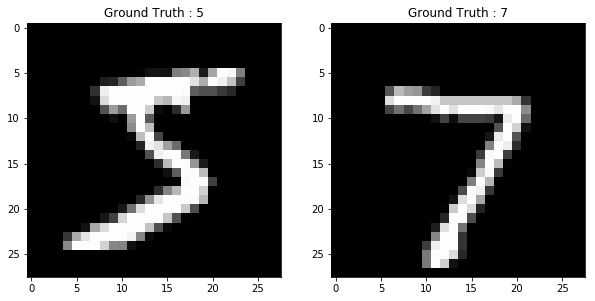

In [4]:
plt.figure(figsize=[10,5])
 
# display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[0]))
 
# display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[0]))

In [5]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [6]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
X_train /= 255 # for gray scale image
X_test /= 255

In [9]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples') # 6000 for each images
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

## Build Model

#### Traditional Neural Network

In [11]:
# change from matrix to array of dimension 28x28 to array of dimention 784
dim_data = np.prod(X_train.shape[1:])
train_data = X_train.reshape(X_train.shape[0], dim_data)
test_data = X_test.reshape(X_test.shape[0], dim_data)

In [12]:
model_nn = Sequential()

In [13]:
model_nn.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(512, activation='relu'))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(num_classes, activation='softmax'))

In [14]:
model_nn.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model_nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [16]:
train_data.shape, y_train.shape

((60000, 784), (60000, 10))

In [17]:
test_data.shape, y_test.shape

((10000, 784), (10000, 10))

In [18]:
history_nn = model_nn.fit(train_data, y_train, batch_size=256, epochs=20, verbose=True, 
                    validation_data=(test_data, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 31s 517us/step - loss: 0.3998 - acc: 0.8764 - val_loss: 0.1414 - val_acc: 0.9559
Epoch 2/20
60000/60000 [==============================] - 23s 384us/step - loss: 0.1727 - acc: 0.9473 - val_loss: 0.0977 - val_acc: 0.9690
Epoch 3/20
60000/60000 [==============================] - 23s 385us/step - loss: 0.1328 - acc: 0.9606 - val_loss: 0.0825 - val_acc: 0.9752
Epoch 4/20
60000/60000 [==============================] - 28s 471us/step - loss: 0.1108 - acc: 0.9665 - val_loss: 0.0726 - val_acc: 0.9781
Epoch 5/20
60000/60000 [==============================] - 24s 398us/step - loss: 0.0950 - acc: 0.9707 - val_loss: 0.0728 - val_acc: 0.9776
Epoch 6/20
60000/60000 [==============================] - 46s 760us/step - loss: 0.0836 - acc: 0.9741 - val_loss: 0.0665 - val_acc: 0.9802
Epoch 7/20
60000/60000 [==============================] - 22s 365us/step - loss: 0.0790 - acc: 0.9754 - val_loss: 0.

In [19]:
score = model_nn.evaluate(test_data, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 8s 782us/step
Test loss: 0.061858009937394674
Test accuracy: 0.9831


Text(0.5, 1.0, 'Loss Curves')

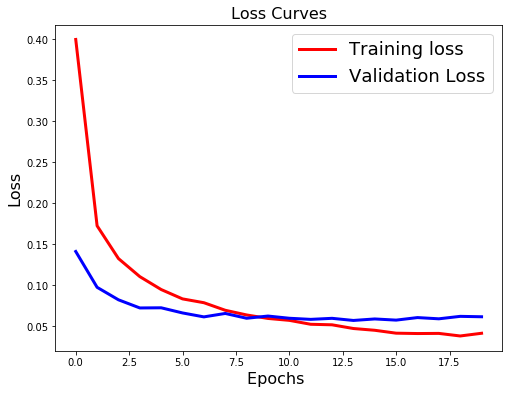

In [20]:
# plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_nn.history['loss'],'r',linewidth=3.0)
plt.plot(history_nn.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

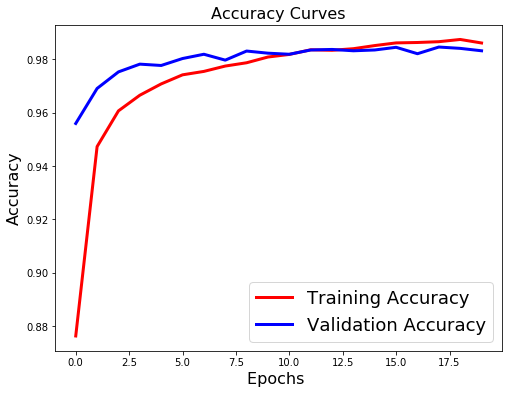

In [21]:
# plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_nn.history['acc'],'r',linewidth=3.0)
plt.plot(history_nn.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [22]:
# try to predict class
model_nn.predict_classes(test_data[[3],:])

array([0])

In [23]:
# try to predict probabilities
model_nn.predict(test_data[[3],:])

array([[9.99998450e-01, 2.46029308e-11, 5.28828803e-09, 1.78176654e-10,
        7.72477904e-09, 2.34837838e-09, 1.48491472e-06, 9.42958689e-09,
        2.23166249e-10, 1.04474246e-07]], dtype=float32)

#### Convolutional Neural Network

In [ ]:
model_cnn = Sequential()

In [ ]:
# input layer
model_cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

In [ ]:
# convolution layers
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.5))

# fully connected dense layers
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0,5))

In [ ]:
# output layer
model_cnn.add(Dense(num_classes, activation='softmax'))

In [ ]:
model_cnn.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
model_cnn.summary()

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_test.shape, y_test.shape

In [ ]:
history_cnn = model_cnn.fit(X_train, y_train, batch_size=32, nb_epoch=10, verbose=True, validation_data=(X_test, y_test))

In [ ]:
score = model_cnn.evaluate(X_test, y_test, verbose=True)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_cnn.history['loss'],'r',linewidth=3.0)
plt.plot(history_cnn.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [ ]:
# plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_cnn.history['acc'],'r',linewidth=3.0)
plt.plot(history_cnn.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Save Model

#### Neural Network

In [38]:
# serialize model to JSON
model_nn_json = model_nn.to_json()
with open("weights/model_nn.json", "w") as json_file:
    json_file.write(model_nn_json)
    
# serialize weights to HDF5
model_nn.save_weights("weights/model_nn.h5")
print("Model saved to disk...")

Model saved to disk...


#### Convolution Neural Network

In [39]:
# serialize model to JSON
model_cnn_json = model_cnn.to_json()
with open("weights/model_nn.json", "w") as json_file:
    json_file.write(model_cnn_json)
    
# serialize weights to HDF5
model_cnn.save_weights("weights/model_cnn.h5")
print("Model saved to disk...")

Model saved to disk...


</hr>